<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Виктор! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Привет, Дмитрий! Спасибо за оперативную обратную связь и подробное ревью.

</div>

# Поиск по изображениям.
В фотохостинге для профессиональных фотографов «Со Смыслом» пользователи размещают свои фотографии на хостинге и сопровождают их полным описанием: указывают место съёмок, модель камеры и т. д.
Необходимо разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии требуется модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

**Описание данных:**  
В файле train_dataset.csv собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.

В папке train_images содержатся изображения для тренировки модели.

В файле CrowdAnnotations.tsv — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

    Имя файла изображения.
    Идентификатор описания.
    Доля людей, подтвердивших, что описание соответствует изображению.
    Количество человек, подтвердивших, что описание соответствует изображению.
    Количество человек, подтвердивших, что описание не соответствует изображению.

В файле ExpertAnnotations.tsv содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

    Имя файла изображения.
    Идентификатор описания.
    3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле test_queries.csv находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>.

В папке test_images содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

## 1. Исследовательский анализ данных.

Импорт необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import nltk
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models.feature_extraction import create_feature_extractor
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from PIL import Image

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
DATA_PATH = '/content/drive/MyDrive/overall_project_4/'
# TRAIN_IMAGE_FOLDER = '/content/drive/MyDrive/overall_project_4/train_images'
# TEST_IMAGE_FOLDER = '/content/drive/MyDrive/overall_project_4/test_images'
RANDOM_STATE = 42


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Очень хорошо,  что ты вынес пути к папкам с изображениями в отдельные константы. Но советую создать ОДНУ базовую константу с путем к папкам с данными, а все остальные пути уже собрать используя этот базовый путь.
    
Также этот путь стоит использовать для загрузки датафреймов (см. комментарий ниже)
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Базовую константу добавил.

</div>

### 1.1 Загрузка данных.

Загрузка данных, необходимых для обучения:

In [4]:
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
display(df_train.head())
df_train.info()

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:

    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
    
</div>

Исправил по всему проекту.

Загрузка информации по соответствию изображения и описания, полученные с помощью краудсорсинга:

In [5]:
df_crowd = pd.read_csv(os.path.join(DATA_PATH, 'CrowdAnnotations.tsv'), sep='\t',
                       header=None, names=['image', 'query_id', 'positive', 'n_conf', 'n_not_conf'])
display(df_crowd.head())
df_crowd.info()

,image,query_id,positive,n_conf,n_not_conf
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       47830 non-null  object 
 1   query_id    47830 non-null  object 
 2   positive    47830 non-null  float64
 3   n_conf      47830 non-null  int64  
 4   n_not_conf  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


Загрузка информации по соответствию изображения и описания, полученные в результате опроса экспертов:

In [6]:
df_expert = pd.read_csv(os.path.join(DATA_PATH, 'ExpertAnnotations.tsv'), sep='\t',
                       header=None, names=['image', 'query_id', 'mark_1', 'mark_2', 'mark_3'])
df_expert.reset_index(inplace=True, drop=True)
display(df_expert.head())
df_expert.info()

,image,query_id,mark_1,mark_2,mark_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   mark_1    5822 non-null   int64 
 3   mark_2    5822 non-null   int64 
 4   mark_3    5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


In [7]:
print('Уникальных уникальных изображений в тренировочной выборке:', len(df_train['image'].unique()))
print('Уникальных уникальных запросов в тренировочной выборке:', len(df_train['query_text'].unique()))

Уникальных уникальных изображений в тренировочной выборке: 1000
Уникальных уникальных запросов в тренировочной выборке: 977


<BarContainer object of 10 artists>

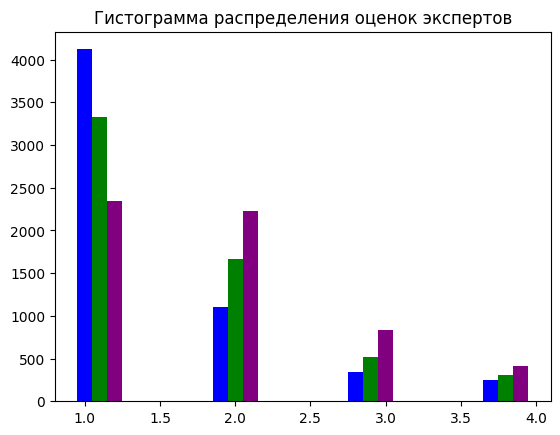

In [8]:
fig, ax = plt.subplots()
plt.title('Гистограмма распределения оценок экспертов')
a_heights, a_bins = np.histogram(df_expert['mark_1'])
b_heights, b_bins = np.histogram(df_expert['mark_2'], bins=a_bins)
c_heights, c_bins = np.histogram(df_expert['mark_3'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='blue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='green')
ax.bar(c_bins[:-1]+2*width, c_heights, width=width, facecolor='purple')

Видно, что в основном изображения слабо соответсвуют запросам: эксперты ставят оценки 1 и 2 намного чаще, чем 3 и 4.

<Axes: >

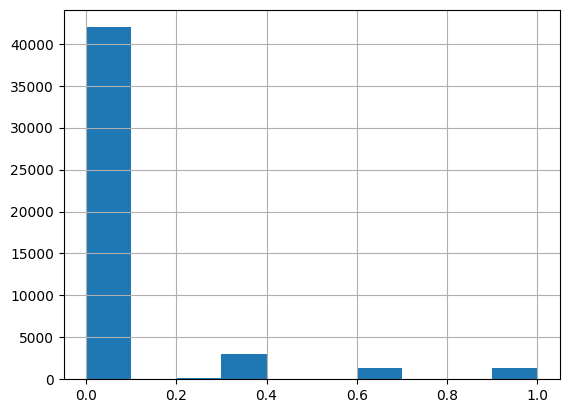

In [9]:
df_crowd['positive'].hist()

Для оценок, полученных в результате краудсорсинга, характерна та же картина, что и для экспертных оценок: в основном люди утверждали о несоответсвии запроса и изображения.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Ты ограничил знакомство с данными выводом head и info. Это безусловно полезно, но мало для содержательного EDA, Попробую сформулировать вопросы, ответить на которые будет интересно:
    
  - Количество уникальных изображений в обучающем и тестовом наборах
  - Количество уникальных запросов  
  - Количество оценок в экспертном и краудсорсинговом наборах.
  - Что представляют из себя экспертные оценки, что представляют из себя краудсорсинговые оценки (можно изучить распределения)
  - Соответствие изображений и описаний друг другу в обучающем и тестовом наборах (оказывается практически все описания и изображения в файле test_queries соответствуют друг другу.
  - Обрати внимание, что query_id содержит в себе имя изображения, к которому он 100% соответствует (1177994172_10d143cb8d.jpg#0 - это query_id, первая часть - это имя файла, и через решетку порядковый  номер описания для этого файла).   
  - Также было бы интересно познакомиться с изображениями, входящими в датасеты.  
    
    
Выводы о том, с какими данными мы продолжим работу.
 </div>

### 1.2 Работа с признаками.

Обработка результатов экспертов:

In [10]:
# Получение средней оценки экспертов
def get_experts_avg(row):
  # array = [row['mark_1'], row['mark_2'], row['mark_3']]
  # u, c = np.unique(array, return_counts=True)
  # y = u[c == c.max()]
  return (row[['mark_1', 'mark_2', 'mark_3']].mean() - 1)/3


# Получение доли экспертов, которые признали соответствие текста и изображения
# def get_experts_positive(row):
#   k = 0
#   for mark in row[['mark_1', 'mark_2', 'mark_3']]:
#     if mark >= 3:
#       k += 1
#   return k/3

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Давай посмотрим на функцию get_experts_avg.  Первые три строки в коде функции никак не влияют на результат.  Всё что ты делаешь важное - это последняя строка, где return

</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Что касается подхода с функцией get_experts_positive, то я не вижу необходимости в этой оценке. Ниже распишу подробнее, в чем я вижу проблему.    
    

</div>


In [11]:
# df_expert['mark_avg'] = df_expert.apply(get_experts_avg, axis = 1)
df_expert['positive'] = df_expert.apply(get_experts_avg, axis = 1)
# df_expert['positive'] = df_expert.apply(get_experts_positive, axis = 1)
df_expert.head(20)

,image,query_id,mark_1,mark_2,mark_3,positive
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,0.111111
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,0.111111
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,0.222222
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,0.111111
5,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1,1,1,0.000000
6,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,1,1,1,0.000000
7,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2,0.111111
8,106490881_5a2dd9b7bd.jpg,1425069308_488e5fcf9d.jpg#2,1,1,1,0.000000
9,106490881_5a2dd9b7bd.jpg,1714316707_8bbaa2a2ba.jpg#2,2,2,2,0.333333


In [12]:
df_expert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     5822 non-null   object 
 1   query_id  5822 non-null   object 
 2   mark_1    5822 non-null   int64  
 3   mark_2    5822 non-null   int64  
 4   mark_3    5822 non-null   int64  
 5   positive  5822 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 273.0+ KB


In [13]:
df_expert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     5822 non-null   object 
 1   query_id  5822 non-null   object 
 2   mark_1    5822 non-null   int64  
 3   mark_2    5822 non-null   int64  
 4   mark_3    5822 non-null   int64  
 5   positive  5822 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 273.0+ KB


### 1.3 Объединение оценок.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В выбранном тобой подходе я вижу две проблемы. Могу предположить, что причина их появление - недостаточное знакомство с нашим датасетом и непонимание его специфики.
    
Во первых, нужно понимать, что ценность экспертных оценок в том, что они оценивали соответствие изображений и описаний по шкале, соответственно чем ближе изображение описанию, тем выше будет оценка.
    
Переходя к подсчету позитивных оценок ты загрубляешь эту оценку, фактически переводя её в шкалу "да-нет" и мы теряем "полутона". Например сейчас нет разницы между оценками 1 и 2, а также оценками 3 и 4.
    
Гораздо полезнее было бы просто взять среднее по оценкам  и привести это среднее к шкале 0-1 простым линейным преобразованием (x-1)/3
    
------------------------
    
Теперь об использовании крауд оценок. Фактически ты их не используешь. Точнее код конечно есть, но ты не учитываешь, что датафреймы train_dataset и df_expert содержат одни и те же пары, поэтому даже если какие-то изменения и были совершены в оценке, эти записи потом просто были удалены в результате объединения.
    
И наверное это даже хорошо, т.к. если уж и брать что-то из крауд оценок, то не количество "позитивных" отзывов, а именно долю позитивных среди всех крауд оценок.
    
Иначе, если даже если хотя-бы один из 10 краудсорсеров поставил позитивную оценку а остальные поставили негативную, ты бы поставил этой паре позитивную оценку.
    
--------------------------
    
    
Что советую сделать? Советую использовать только экспертные оценки, при этом сформировать экспертную оценку нужно именно так, как я описал тебе выше.    
    
Оставлю комментарий для анализа подходов к объединению разных источников оценок в этом проекте.
</div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Обработку оценок исправил выше, также внес изменения по ходу проекта.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
  
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....


</div>

Формирование индексов:

In [14]:
df_crowd.set_index(['image', 'query_id'], inplace=True)
df_expert.set_index(['image', 'query_id'], inplace=True)

Объединение таблиц:

In [15]:
annotations = df_crowd[['positive']].merge(
    # df_expert[['mark_avg', 'positive']],
    df_expert['positive'],
    how='outer',
    left_index=True,
    right_index=True,
    suffixes=('_crowd', '_expert')
)

In [16]:
annotations.head()

positive_crowd  \
image                     query_id                                      
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2             1.0   
                          114051287_dd85625a04.jpg#2              0.0   
                          1427391496_ea512cbe7f.jpg#2             0.0   
                          2073964624_52da3a0fc4.jpg#2             0.0   
                          2083434441_a93bc6306b.jpg#2             0.0   

                                                       positive_expert  
image                     query_id                                      
1056338697_4f7d7ce270.jpg 1056338697_4f7d7ce270.jpg#2              NaN  
                          114051287_dd85625a04.jpg#2               NaN  
                          1427391496_ea512cbe7f.jpg#2              NaN  
                          2073964624_52da3a0fc4.jpg#2              NaN  
                          2083434441_a93bc6306b.jpg#2              NaN

In [17]:
annotations.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51323 entries, ('1056338697_4f7d7ce270.jpg', '1056338697_4f7d7ce270.jpg#2') to ('997722733_0cb5439472.jpg', '997722733_0cb5439472.jpg#2')
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   positive_crowd   47830 non-null  float64
 1   positive_expert  5822 non-null   float64
dtypes: float64(2)
memory usage: 1.1+ MB


Функция для объединения оценок экспертов и результатов краудсорсинга:

In [18]:
# def join_positive_expert_priority(row):
#     crowd = row['positive_crowd']
#     expert = row['positive_expert']

#     if expert >= 0:
#         # Экспертные мнения важнее
#         return expert

#     # Если эксперты не дали оценку, можно взять результат из кроудсорсинга
#     if crowd >= 0 and expert != expert:
#         return crowd

#     return 0

In [19]:
# annotations['positive'] = annotations.apply(join_positive_expert_priority, axis=1)

In [20]:
annotations.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51323 entries, ('1056338697_4f7d7ce270.jpg', '1056338697_4f7d7ce270.jpg#2') to ('997722733_0cb5439472.jpg', '997722733_0cb5439472.jpg#2')
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   positive_crowd   47830 non-null  float64
 1   positive_expert  5822 non-null   float64
dtypes: float64(2)
memory usage: 1.1+ MB


In [21]:
df_train.set_index(['image', 'query_id'], inplace=True)
train_dataset = df_train.merge(annotations, how='left', left_index=True, right_index=True)
# train_dataset['positive'].value_counts()
train_dataset['positive_expert'].value_counts()

,count
positive_expert,
0.000000,2350
0.111111,965
0.222222,689
0.333333,678
0.444444,324
1.000000,247
0.666667,241
0.555556,193
0.777778,75


In [22]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5822 entries, ('1056338697_4f7d7ce270.jpg', '2549968784_39bfbe44f9.jpg#2') to ('968081289_cdba83ce2e.jpg', '2292406847_f366350600.jpg#2')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   query_text       5822 non-null   object 
 1   positive_crowd   2329 non-null   float64
 2   positive_expert  5822 non-null   float64
dtypes: float64(2), object(1)
memory usage: 368.4+ KB


In [23]:
train_dataset.head()

,,query_text,positive_crowd,positive_expert
image,query_id,,,
1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0,0.000000
1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000
2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0,0.222222
2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0,1.000000
2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000


### 1.4 Визуальный просмотр данных.

Функция для выводы изображения на экран:

In [24]:
def image_show(images, titles=None, nums=None):
    fig = plt.figure(figsize=(10, len(images) * 3))
    for i in range(len(images)):
        fig.add_subplot(len(images), 1, i + 1)
        img = Image.open(images[i])
        if titles != None:
            if nums != None:
                if nums[i] == None:
                    plt.title(f'\n{titles[i]}', fontsize = 10)
                else:
                    plt.title(f'\n{str(nums[i])}\n{titles[i]}', fontsize = 10)
            else:
                plt.title(f'\n{titles[i]}', fontsize = 10)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

Выводы на экран 10 случайных изображений:

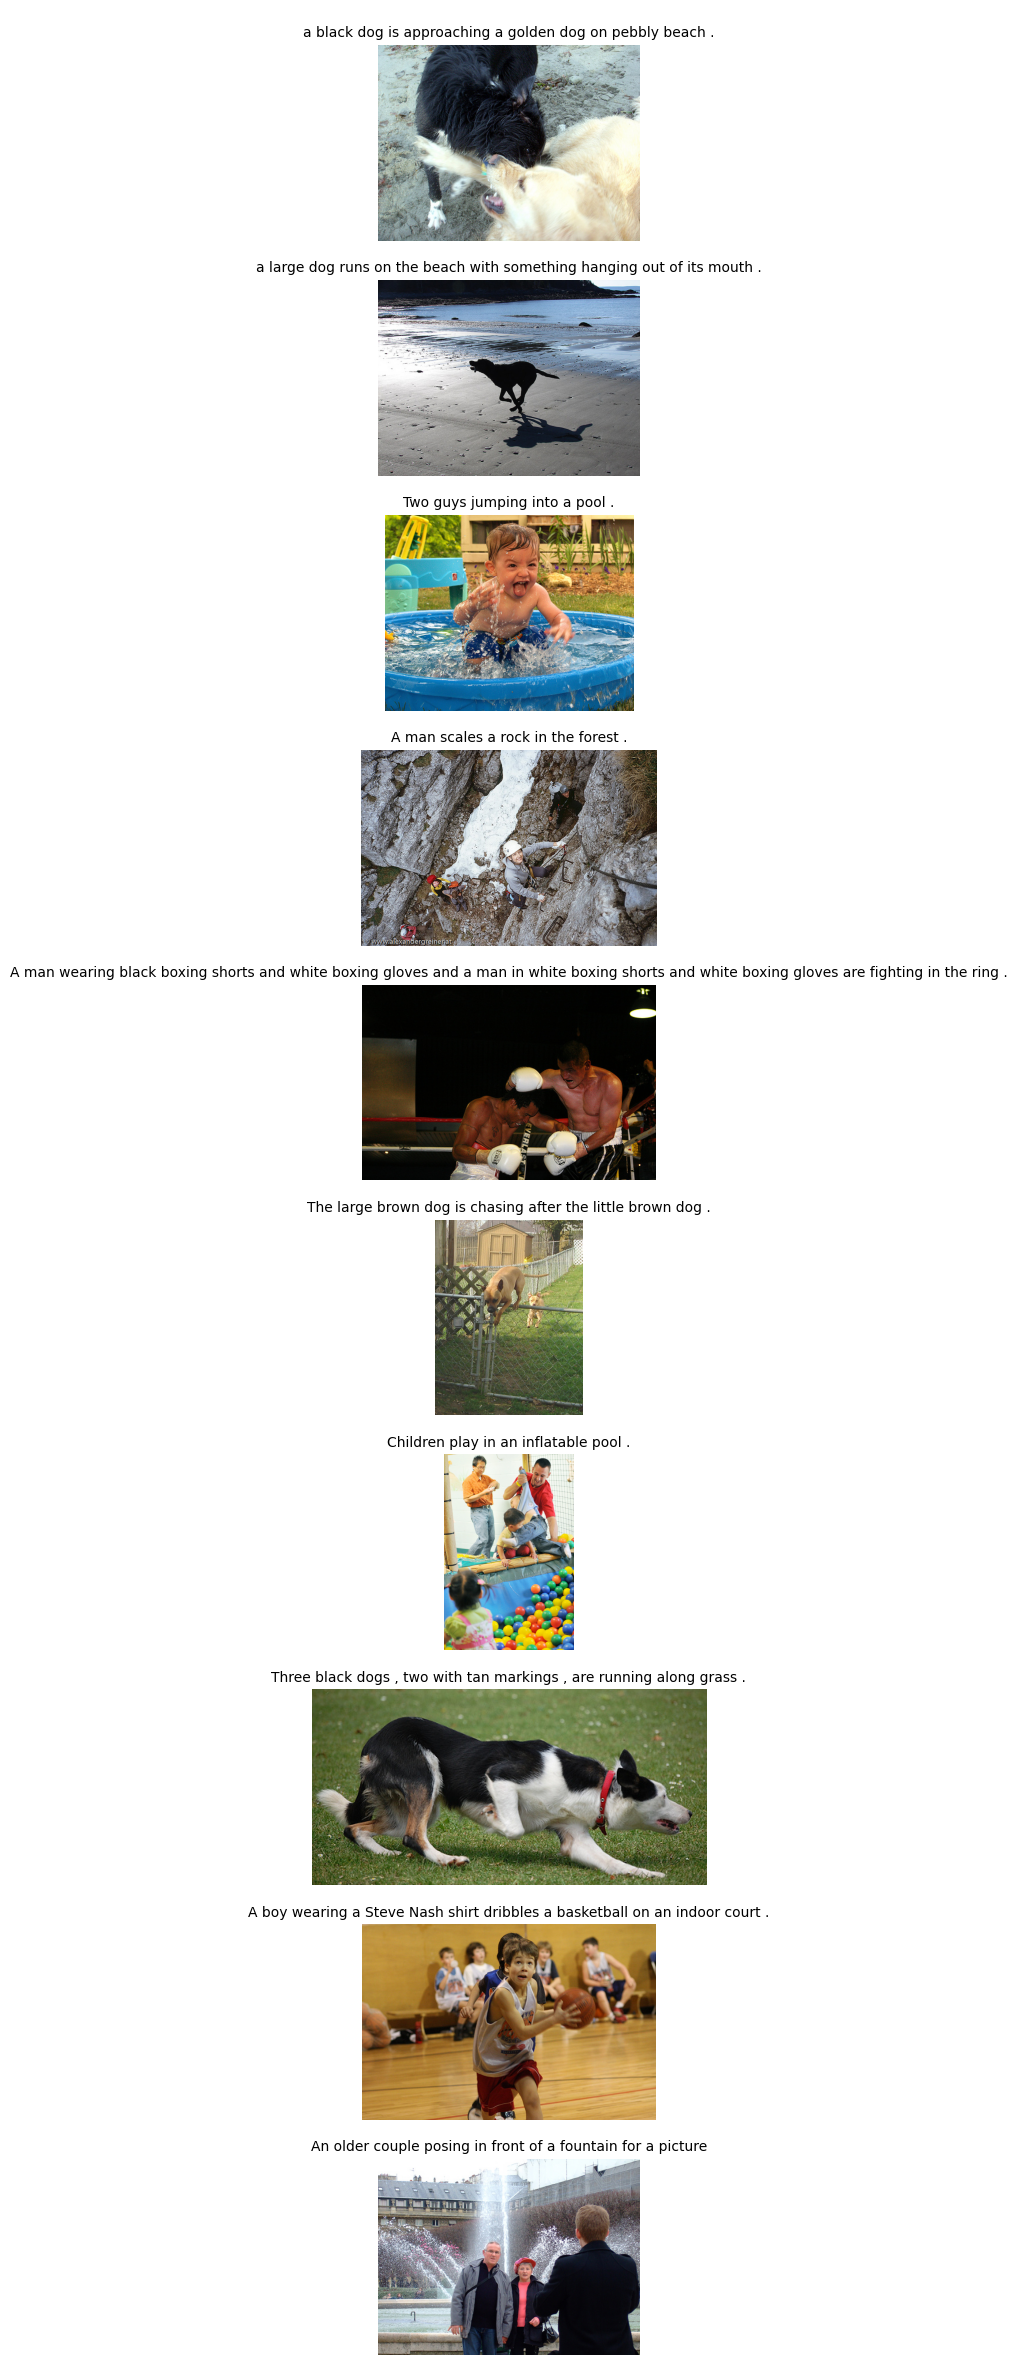

In [25]:
visual_dataset = train_dataset[train_dataset['positive_expert'] > 0.5].sample(10).copy()
visual_dataset.reset_index(inplace=True)

images = []
labels = []

for i in range(visual_dataset.shape[0]):
    images.append(os.path.join(os.path.join(DATA_PATH,'train_images'), visual_dataset.iloc[i]["image"]))
    labels.append(visual_dataset.iloc[i]['query_text'])

image_show(images, labels)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## 2. Подготовка данных.

### 2.1 Стоп-слова.

Составим список слов, которые могут попадать под юридические ограничения, а именнно относящиеся к детям:

In [26]:
stop_words = [
    'baby',
    'child',
    'boy',
    'boys',
    'girl',
    'girls',
    'kid',
    'kids',
    'children'
]

Функция для определения стоп-слов в описании:

In [27]:
def ban(txt):
    txt = txt.lower()
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(txt)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_tokens])

    for word in stop_words:
        word_len = len(word.split())

        if word_len > 1:
            if word in txt:
                return True
        elif word_len == 1:
            if word in txt.split():
                return True

    return False

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Идея с лемматизацией хороша. Но она очень "дорогая" - хорошая лемматизация занимает время. Кроме того ведь её нужно написать, проверить на ошибки, возможно "утащить в прод"..
    
А между тем лемматизация  нужна нам в двух случаях:  

 - При чистке датасета от детских изображений.
 - При векторизации.
    
При поиске детских изображений я  считаю возможным упростить себе жизнь - взять возможные словоформы "запрещенных" слов. Как правиль их всего две - единственное и множественное число.
    
А для вкторизациии делать лемматизацию в нашем случае не нужно. Модель BERT обучалась на обычных, сырых,не лемматизированных текстах.    

    
</div>

Определение записей со стоп-словами:

In [28]:
train_dataset['ban'] = train_dataset['query_text'].apply(ban)

In [29]:
train_dataset.head(10)

,,query_text,positive_crowd,positive_expert,ban
image,query_id,,,,
1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0,0.000000,True
1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000,True
2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0,0.222222,True
2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0,1.000000,True
2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000,True
3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0,0.444444,True
3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000,True
3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000,True
343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,NaN,0.000000,True


Удаление записей со стоп-словами:

In [30]:
train_dataset.drop(train_dataset[train_dataset.ban == True].index, inplace=True)
train_dataset.drop(columns=['ban'], inplace=True)

In [31]:
train_dataset.head()

,,query_text,positive_crowd,positive_expert
image,query_id,,,
1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.111111
3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.222222
463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.333333
488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.222222
534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.111111


In [32]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4295 entries, ('1056338697_4f7d7ce270.jpg', '3181701312_70a379ab6e.jpg#2') to ('968081289_cdba83ce2e.jpg', '2292406847_f366350600.jpg#2')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   query_text       4295 non-null   object 
 1   positive_crowd   1801 non-null   float64
 2   positive_expert  4295 non-null   float64
dtypes: float64(2), object(1)
memory usage: 197.6+ KB


После очистки количество записей в датафрейме составляет 4295. Датафрейм уменьшился примерно на четверть.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удаляешь комментарии, в которых есть слова, обозначающие детей. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    

И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста выведи размерность (лучше через info) для датафрейма, который остался после чистки, чтобы мы могли оценить количество потерянных пар. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Размерность вывел выше.

</div>

### 2.2 Векторизация изображений.

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [34]:
# Использование модели ResNet50, предобученнной на Imagenet
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.to(device)
model.eval()

preprocess = weights.transforms(antialias=True)

return_nodes = {'flatten': 'flatten'}
feature_extractor = create_feature_extractor(model, return_nodes=return_nodes)

In [35]:
def get_image_vector(image_path):
    # Обработка изображения
    image = read_image(image_path).unsqueeze(0)
    model_input = preprocess(image).to(device)

    with torch.no_grad():
        features = feature_extractor(model_input)
        flatten_fts = features["flatten"].squeeze()
        return flatten_fts.to('cpu').detach().numpy()

In [36]:
# Словарь для хранения результатов обработки изображений
image_vectors = {}

def images2vector(folder):
    count = 0
    for p in Path(folder).glob('*.jpg'):
        count+=1
    with tqdm(total=count) as bar:
        for p in Path(folder).glob('*.jpg'):
            image_vectors[p.name] = get_image_vector(folder + f'/{p.name}')
            bar.update(1)

In [37]:
images2vector(os.path.join(DATA_PATH,'train_images'))

100%|██████████| 1000/1000 [04:23<00:00,  3.80it/s]


In [38]:
# Проверка размерности вектора
img1 = list(image_vectors.keys())[10]
print(f'Размерность вектора изображения {image_vectors[img1].shape[0]}')

Размерность вектора изображения 2048


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

### 2.3 Векторизация текстов.

In [39]:
# Использование легкой модели DistilBERT
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
model = AutoModel.from_pretrained('distilbert-base-uncased')
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [40]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [41]:
# Функция для обработки строки запроса
def text2vector(sentences):
    encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=128, return_tensors='pt').to(device)

    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    ar = sentence_embeddings[0].to('cpu').detach().numpy()
    return ar

In [42]:
# Создание векторов строк
train_dataset['text2vec'] = train_dataset['query_text'].apply(lambda x: text2vector(x))

In [43]:
print(f'Размерность вектора текста {train_dataset.iloc[0]["text2vec"].shape}')

Размерность вектора текста (768,)


In [44]:
train_dataset.head()

,,query_text,positive_crowd,positive_expert,text2vec
image,query_id,,,,
1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.111111,"[0.15153733, -0.097373046, -0.015055531, -0.02..."
3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.222222,"[0.15153733, -0.097373046, -0.015055531, -0.02..."
463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.333333,"[0.15153733, -0.097373046, -0.015055531, -0.02..."
488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.222222,"[0.15153733, -0.097373046, -0.015055531, -0.02..."
534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.111111,"[0.15153733, -0.097373046, -0.015055531, -0.02..."


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично,полученные векторные представления для текстов описаний с помощью BERT </div>

### 2.4 Объединение векторов.

In [45]:
train_dataset.reset_index(inplace=True)

In [46]:
def image2vector(row):
    img = row['image']
    return image_vectors[img]

In [47]:
# Добавление векторов изображений в датафрейм
train_dataset['image2vec'] = train_dataset.apply(image2vector, axis=1)

In [48]:
# Конкатенация векторов
def join_vectors(row):
    return np.concatenate((row['text2vec'], row['image2vec']))

In [49]:
train_dataset['vec'] = train_dataset.apply(join_vectors, axis=1)

In [50]:
df = train_dataset.copy()

In [51]:
df.head()

,image,query_id,query_text,positive_crowd,positive_expert,text2vec,image2vec,vec
0,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.111111,"[0.15153733, -0.097373046, -0.015055531, -0.02...","[0.5572214, 0.010324237, 0.056719862, 2.400106...","[0.15153733, -0.097373046, -0.015055531, -0.02..."
1,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.222222,"[0.15153733, -0.097373046, -0.015055531, -0.02...","[0.13535734, 0.0, 0.014555954, 0.0035796026, 0...","[0.15153733, -0.097373046, -0.015055531, -0.02..."
2,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.333333,"[0.15153733, -0.097373046, -0.015055531, -0.02...","[0.043913603, 0.01846362, 0.0, 0.0900104, 0.11...","[0.15153733, -0.097373046, -0.015055531, -0.02..."
3,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.222222,"[0.15153733, -0.097373046, -0.015055531, -0.02...","[0.070010796, 0.0, 0.0, 0.031735044, 0.0, 0.04...","[0.15153733, -0.097373046, -0.015055531, -0.02..."
4,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,NaN,0.111111,"[0.15153733, -0.097373046, -0.015055531, -0.02...","[0.13674653, 0.0, 0.0, 0.10356082, 0.22423275,...","[0.15153733, -0.097373046, -0.015055531, -0.02..."


In [52]:
# Удаление записей без оценки
# df.drop(df[df['positive'].isna()].index, inplace=True)
df.drop(df[df['positive_expert'].isna()].index, inplace=True)
df = df.reset_index(drop=True)

In [53]:
print(f'Длина результирующего вектора: {len(df.iloc[0]["vec"])}.')

Длина результирующего вектора: 2816.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

## 3. Обучение модели.

Разделение данных на тренировочную и тестовую выборки в пропорции 7:3 таким образом, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

In [54]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=RANDOM_STATE)
# train_indices, test_indices = next(gss.split(X=df.drop(columns=['positive']), y=df['positive'], groups=df['image']))
train_indices, test_indices = next(gss.split(X=df.drop(columns=['positive_crowd', 'positive_expert']),
                                             y=df['positive_expert'], groups=df['image']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Только давай разберемся с выборками. Финальное тестирование (визуальное) мы делаем на отложенной выборке. Поэтому выборка,которую ты сейчас отделил играет роль валидационной. Есть смысл в её названии использовать слово valid а не test</div>

In [55]:
features_train = torch.FloatTensor(list(train_df.loc[:, 'vec'].values))
features_test = torch.FloatTensor(list(test_df.loc[:, 'vec'].values))

<ipython-input-55-74d94a739f06>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  features_train = torch.FloatTensor(list(train_df.loc[:, 'vec'].values))


In [56]:
target_train = torch.FloatTensor(train_df['positive_expert'].values).reshape(-1, 1)
target_test = torch.FloatTensor(test_df['positive_expert'].values).reshape(-1, 1)

In [57]:
# Класс для масштабирования тензора
class TorchStandardScaler:
    def fit(self, x):
        self.mean = x.mean(0, keepdim=True)
        self.std = x.std(0, unbiased=False, keepdim=True)
    def transform(self, x):
        x -= self.mean
        x /= (self.std + 1e-7)
        return x

In [58]:
# Масштабирование данных
scaler = TorchStandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обычно перед линейной регрессией и нейронкой я настаиваю на масштабировании  признаков, т.к. это может помочь модели лучше сходиться.  И для любого классического проекта (в том числе выпускного) это строгая рекомендаци.
    
Но в нашем проекте это не очень однозначно. Да, с одной стороны модель будет уделать одинаковое влияние обоим признакам, да и учиться будет быстрее.    

Но есть и минусы масштабирования:

 - Нарушение структуры эмбеддингов – смысл и семантические связи в эмбеддингах могут быть изменены.
 - Потеря важности признаков – относительная важность признаков из разных моделей (ResNet и BERT) может быть потеряна.

Рекомендация:

Попробуй оба подхода (с масштабированием и без) и сравни результаты, чтобы выбрать оптимальный вариант.  Предполагаю что для нейронки подход без масштабирования может сработать лучше  
    

</div>

### 3.1 Модель на основе линейной регрессии.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

Для определения качества моделей будем использовать метрику RMSE. Она удобна тем, что минимизируется одновременно с MSE, которая дает хорошую скорость обучения нейронных сетей, и измеряется в тех же единицах, что и целевая переменная.

In [59]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)

LinearRegression()

In [60]:
pred = model_lr.predict(features_test)
rmse_lr = (mean_squared_error(target_test, pred)) ** 0.5
print(f'RMSE для LinearRegression равно', round(rmse_lr, 3))

RMSE для LinearRegression равно 0.36


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Обрати внимание на достаточно большие значения метрики. По моим наблюдениям в этом проекте линейные модели могут сильно переобучаться. Мы можем попробовать использовать модели с регуляризацией (Ridge/Laso), а также это сигнал обязательно использовать регуляризацию для нейронки </div>

### 3.2 Полносвязная нейронная сеть.

In [61]:
# Создание датасета
class CustomDataset(Dataset):
    def __init__(self, features, target):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

In [62]:
# Создание DataLoader
train_dataset = CustomDataset(features_train, target_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomDataset(features_test, target_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [63]:
# Проверка размерностей
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 2816])
Labels batch shape: torch.Size([32, 1])


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Советую размер батча брать побольше (пока модель может обучаться на GPU). В этом случае обучение модели происходит более плавно.</div>

In [64]:
# Определение архитектуры нейронной сети
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2816, 4096)
        self.fc2 = nn.Linear(4096, 2048)
        self.fc3 = nn.Linear(2048, 512)
        self.fc4 = nn.Linear(512, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 1)

        self.dp = nn.Dropout(p=0.2)
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dp(x)

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dp(x)

        x = self.fc3(x)
        x = self.relu(x)
        x = self.dp(x)

        x = self.fc4(x)
        x = self.relu(x)
        x = self.dp(x)

        x = self.fc5(x)
        x = self.relu(x)
        x = self.dp(x)

        x = self.fc6(x)

        return x

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Тут ты наверное перестарался со  ложностью сети. Если честно подсчиттаь количество обучаемых параметров в этой нейронке, то оно окажется почти 80 миллионов.

Это в три раза больше чем модель Resnet50 (25 миллионов), больше чем DistilBERT (66 миллионов)  и почти дотягивает до BERT (110 миллионов).
    
При этом для обучения модели у тебя всего 3000 объектов. Для сравнения Resnet обучалась на 1.28M изображений, а DistilBERT на 16GB текста ( примерно 1 миллиард слов)    

Советую уменьшит сложность сети. Это повысит шансы на адекватное обучение.    
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Нейросеть упростил.

</div>

Определение параметров обучения нейронной сети:

In [65]:
models = Net()
models.to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(models.parameters(), lr=5e-6)

epochs = 10
min_valid_loss = np.inf

Обучение нейронной сети:

In [66]:
for e in range(epochs):
    train_loss = 0.0
    models.train()
    for data, labels in train_dataloader:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        target = models(data)
        loss = torch.sqrt(criterion(target,labels))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    valid_loss = 0.0
    models.eval()

    for data, labels in test_dataloader:
        data, labels = data.to(device), labels.to(device)

        target = models(data)
        loss = torch.sqrt(criterion(target, labels))
        valid_loss += loss.item()
    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(train_dataloader)} \t\t Validation Loss: {valid_loss / len(test_dataloader)}')

Epoch 1 		 Training Loss: 0.3752871626301816 		 Validation Loss: 0.29020403027534486
Epoch 2 		 Training Loss: 0.2876216935484033 		 Validation Loss: 0.2582440383732319
Epoch 3 		 Training Loss: 0.26839158284036735 		 Validation Loss: 0.2526408053934574
Epoch 4 		 Training Loss: 0.26016250597803214 		 Validation Loss: 0.2498959731310606
Epoch 5 		 Training Loss: 0.25444083621627406 		 Validation Loss: 0.2513688888400793
Epoch 6 		 Training Loss: 0.24848466499855643 		 Validation Loss: 0.24458968937397002
Epoch 7 		 Training Loss: 0.24214640353855335 		 Validation Loss: 0.2455307725816965
Epoch 8 		 Training Loss: 0.231537999761732 		 Validation Loss: 0.24179311990737914
Epoch 9 		 Training Loss: 0.22730531018031272 		 Validation Loss: 0.240035043656826
Epoch 10 		 Training Loss: 0.2201445863435143 		 Validation Loss: 0.2372390642762184


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Возможно ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
В случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).

 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

## 4. Тестирование модели.

In [67]:
models.eval()

Net(
  (fc1): Linear(in_features=2816, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=2048, bias=True)
  (fc3): Linear(in_features=2048, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=32, bias=True)
  (fc6): Linear(in_features=32, out_features=1, bias=True)
  (dp): Dropout(p=0.2, inplace=False)
  (relu): LeakyReLU(negative_slope=0.01)
)

Загрузка списка тестовых изображений:

In [68]:
test_images_csv = pd.read_csv(os.path.join(DATA_PATH, 'test_images.csv'))
print(test_images_csv.info())
test_images_csv.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 932.0+ bytes
None


,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


Загрузка описаний для тестовых изображений:

In [69]:
test_queries_csv = pd.read_csv(os.path.join(DATA_PATH, 'test_queries.csv'),
                               sep='|', index_col=0)
test_queries_csv.info()
test_queries_csv.head()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


In [70]:
image_vectors = {}
images2vector(os.path.join(DATA_PATH, 'test_images'))

100%|██████████| 100/100 [00:24<00:00,  4.06it/s]


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
да, для тестовых изображений оптимально сделать их векторизацию заранее </div>

In [71]:
def search(txt):
    if ban(txt):
        return os.path.join(DATA_PATH, 'no_image_available.jpg'), f'{txt}\nThis image is unavailable in your country in compliance with local laws.', None

    vec = text2vector(txt)

    data = []
    images = []

    for key in image_vectors.keys():
        images.append(key)

        img = image_vectors[key]
        data.append(np.concatenate((vec, img)))

    with torch.no_grad():
        pred = models(scaler.transform(torch.FloatTensor(data)).to(device)).to('cpu')
        # Индекс записи, которая больше всего подходит под описание
        idx = pred.numpy().argmax(axis=0)[0]

    return f'{DATA_PATH}test_images/{images[idx]}', txt, pred[idx].numpy()[0]

In [72]:
# 10 случайных примеров из тестовых данных:
queries = list(test_queries_csv.sample(10, random_state=RANDOM_STATE)['query_text'])

In [73]:
images = []
labels = []
scores = []

for i in range(len(queries)):

    image_path, title, score = search(queries[i])

    images.append(image_path)
    if score == None:
        scores.append(None)
    else:
        scores.append(round(score, 3))
    labels.append(title)

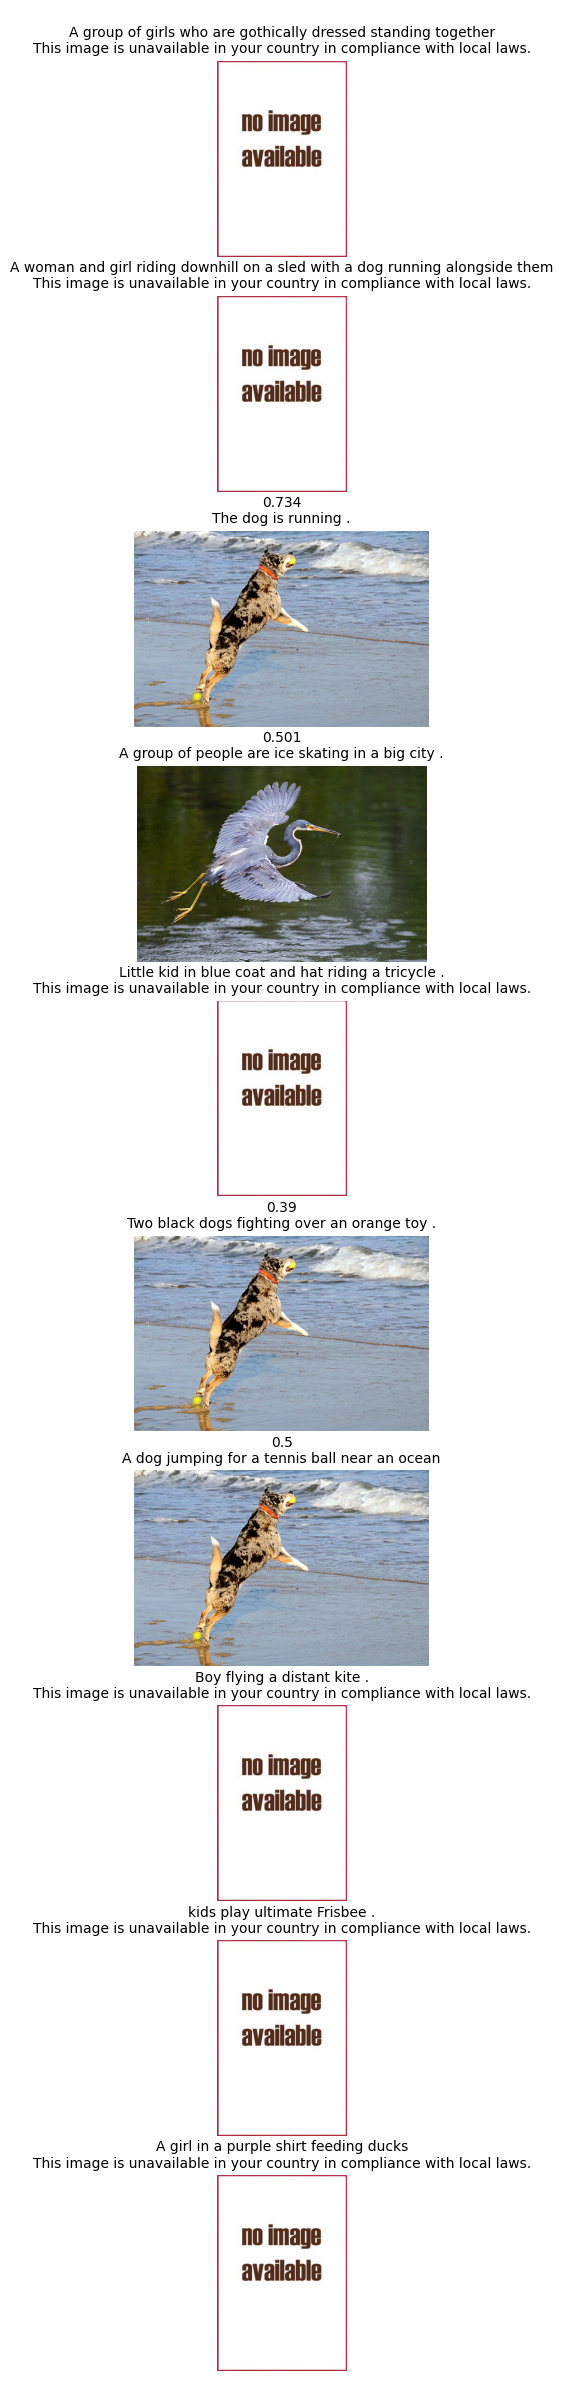

In [74]:
image_show(images, labels, scores)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

К сожалению работают они не очень. Причин несколько
    
 - Не стоило загрублять наш таргет
 - Слишком сложная модель просто недоучилась на небольшом объеме данных (и на всего 5 эпохах)
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
   
</div>

# Выводы.
Для фотохостинга профессиональных фотографов «Со Смыслом» была разработана демонстрационная версию поиска изображений по запросу с учетом юридических ограничений. В ходе проекта:
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений.
- Изображения векторизованы.
- Текстовые запросы векторизованы.
- Данные разбиты на тренировочную и тестовую выборки.
- Предложена метрика качества работы модели - RMSE.
- Обучены модели на основе линейной регрессии и полносвязная нейронная сеть. Лучшие результаты показала нейронная сеть.
- Проведено тестирование работы модели.

Для улучшения качества модели требуется больше данных, также можно поэкспериментировать с архитектурой нейронной сети. Для определения контента, попадающего под юридические ограниченния, рекомендуется создать отдельную модель классификации.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.

    
Пожалуйста отработай подсвеченные красные комментарии.
    
Желтые комментарии на твое усмотрение. Если после внесенных изменений ты увидишь, что наш подход по прежнему "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>